In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("athlete_events.csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
df.shape

(271116, 15)

# 1. Handle null values in dataset and remove unwanted symbols if any.


In [6]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [7]:
df["Medal"]=df["Medal"].fillna("No_Medal")

In [8]:
df=df.dropna()

In [9]:
df.shape

(206165, 15)

In [10]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [11]:
df.nunique(axis=0)

ID        99088
Name      98546
Sex           2
Age          61
Height       94
Weight      217
Team        660
NOC         226
Games        51
Year         35
Season        2
City         42
Sport        56
Event       590
Medal         4
dtype: int64

In [12]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No_Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No_Medal


# 2. What is the unique count of sports, events, and different city, and the team participated in the olympics


In [13]:
print('Sport\t',len(pd.unique(df['Sport'])))
print('Event\t',len(pd.unique(df['Event'])))
print('City\t',len(pd.unique(df['City'])))
print('Team\t',len(pd.unique(df['Team'])))

Sport	 56
Event	 590
City	 42
Team	 660


# 3. What is the total count of players from the United States, China, Netherland, Spain, France, Italy?


In [14]:
count=0
for i in df['Team']:
    if(i==("United States" or "China" or "Netherland" or "Spain" or "France" or "Italy")):
       count=count+1
print("Total count of players from the United States, China, Netherland, Spain,France, Italy is ",count)

Total count of players from the United States, China, Netherland, Spain,France, Italy is  13714


# 4. What is the average age of female and male players from the United States, China,Netherland,Spain,France,Italy


In [15]:
df_avg=df[df['Team']==('United States' or 'China' or 'Netherland' or 'Spain' or 'France' or 'Italy')]
df_avg
df.describe()


,ID,Age,Height,Weight,Year
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,68616.017675,25.055509,175.371950,70.688337,1989.674678
std,38996.514355,5.483096,10.546088,14.340338,20.130865
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


In [16]:
df_avg_male=df_avg[df_avg["Sex"]=='M']
df_avg_male['Age'].mean() # average age male of players from the United States, China,Netherland, Spain, France, Italy


25.4158371040724

In [17]:
df_avg_female=df_avg[df_avg["Sex"]=='F']
df_avg_female['Age'].mean() # average age female of players from the United States, China,Netherland, Spain, France, Italy

24.27041444398851

# 5. What are the different kinds of sports in which players have participated in different cities of the United States.


In [18]:
df_new=df[df['Team']=='United States']
df_new['Sport'].unique()


array(['Cross Country Skiing', 'Wrestling', 'Athletics', 'Figure Skating',
       'Cycling', 'Softball', 'Taekwondo', 'Rowing', 'Basketball',
       'Synchronized Swimming', 'Ice Hockey', 'Baseball', 'Handball',
       'Weightlifting', 'Fencing', 'Swimming', 'Volleyball', 'Sailing',
       'Alpine Skiing', 'Football', 'Tennis', 'Judo', 'Snowboarding',
       'Nordic Combined', 'Trampolining', 'Biathlon', 'Ski Jumping',
       'Shooting', 'Freestyle Skiing', 'Boxing', 'Modern Pentathlon',
       'Gymnastics', 'Short Track Speed Skating', 'Hockey', 'Water Polo',
       'Diving', 'Skeleton', 'Canoeing', 'Speed Skating', 'Badminton',
       'Rugby Sevens', 'Table Tennis', 'Curling', 'Archery',
       'Equestrianism', 'Triathlon', 'Luge', 'Rhythmic Gymnastics',
       'Art Competitions', 'Tug-Of-War', 'Golf', 'Rugby'], dtype=object)

# 6. What are the names of players who have brought gold, silver and bronze medal?

In [19]:
df_name=df[df['Medal']==('Gold' or 'Bronze' or 'Silver')]
df_name['Name'].unique()

array(['Paavo Johannes Aaltonen', 'Kjetil Andr Aamodt',
       'Aleksey Aleksandrovich Abalmasov', ...,
       'Ronald Ferdinand "Ron" Zwerver', 'Henk Jan Zwolle',
       'Galina Ivanovna Zybina (-Fyodorova)'], dtype=object)

# 7. Which team has brought the most number of female and male players?

In [20]:
df['Team'].value_counts()

United States    13714
France            7807
Canada            7668
Great Britain     7499
Italy             7433
                 ...  
Rika II              1
Dylan-2              1
Clearwater           1
Angelita             1
Digby                1
Name: Team, Length: 660, dtype: int64

# 8. Draw a suitable graph which depicts different events took place from 1900 to 2016

In [21]:
df['Year'].value_counts().sort_index()

1896       40
1900       71
1904      119
1906      201
1908      366
1912      551
1920      428
1924      582
1928      666
1932      492
1936      896
1948     1016
1952     2058
1956     2595
1960     8038
1964     8711
1968    10203
1972    11482
1976     9567
1980     8217
1984    10868
1988    13636
1992    13109
1994     2971
1996    11838
1998     3518
2000    13682
2002     4060
2004    13399
2006     4365
2008    13402
2010     4378
2012    12524
2014     4673
2016    13443
Name: Year, dtype: int64

In [22]:
df_de=df.drop(df[df['Year']<1900].index)

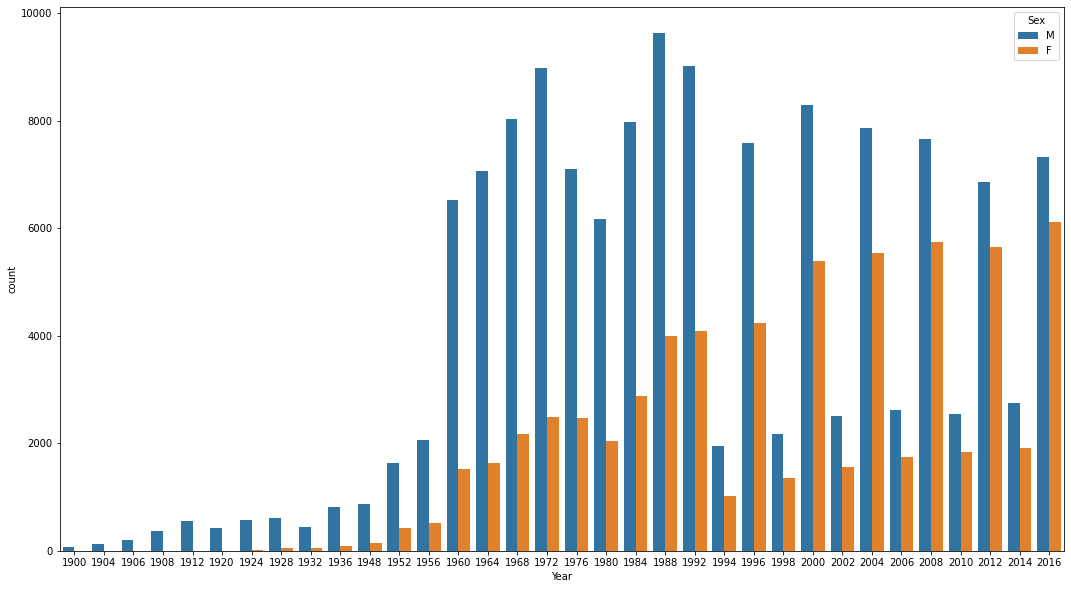

In [23]:
fig,ax=plt.subplots(figsize=(18,10)) #hue : (optional) This parameter take column name for colour encoding
sns.countplot(x='Year', hue="Sex",data=df_de);

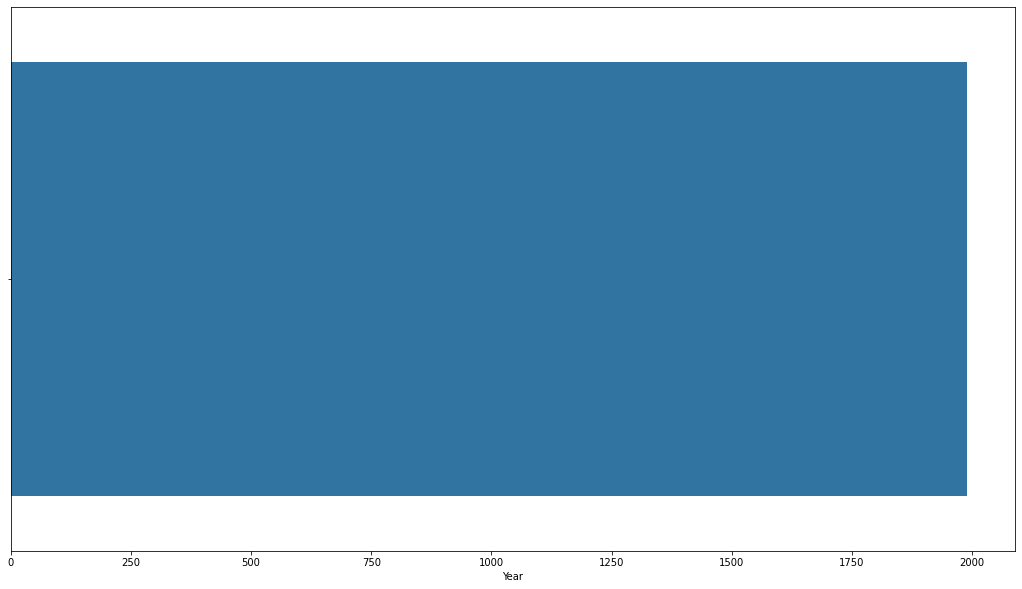

In [24]:
fig,ax=plt.subplots(figsize=(18,10)) #hue : (optional) This parameter take column name for colour encoding
sns.barplot(x='Year', hue="Sex",data=df_de);

# 9. What are the different sports played in a different season?

In [25]:
df.groupby('Season')["Sport"].unique()

Season
Summer    [Basketball, Judo, Badminton, Sailing, Gymnast...
Winter    [Speed Skating, Cross Country Skiing, Ice Hock...
Name: Sport, dtype: object

# 10. What are the average height and weight of players who participated in football, Judo, basketball?



In [26]:
df_avg_w=df[df["Sport"]==("Football" or "Judo" or "Basketball")]
df_avg_w

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
157,61,Stefan Abadzhiev,M,26.0,175.0,72.0,Bulgaria,BUL,1960 Summer,1960,Summer,Roma,Football,Football Men's Football,No_Medal
178,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,CMR,2000 Summer,2000,Summer,Sydney,Football,Football Men's Football,Gold
183,81,Georgios Abaris,M,22.0,190.0,77.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,No_Medal
198,92,Ignazio Abate,M,21.0,180.0,73.0,Italy,ITA,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,No_Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270734,135398,Gianni Michel Eugne Zuiverloon,M,21.0,178.0,70.0,Netherlands,NED,2008 Summer,2008,Summer,Beijing,Football,Football Men's Football,No_Medal
270810,135438,Manuel Ziga Fernndez,M,20.0,172.0,69.0,Spain,ESP,1980 Summer,1980,Summer,Moskva,Football,Football Men's Football,No_Medal
270901,135476,Emily Jane Zurrer,F,21.0,179.0,69.0,Canada,CAN,2008 Summer,2008,Summer,Beijing,Football,Football Women's Football,No_Medal
270982,135504,Viktor Oleksandrovych Zviahintsev,M,25.0,178.0,79.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Football,Football Men's Football,Bronze


In [27]:
df_avg_w=df[df["Sport"]==("Football" or "Judo" or "Basketball")]
df_avg_w["Height"].mean()

175.43641683547153

In [28]:
df_avg_h=df[df["Sport"]==("Football" or "Judo" or "Basketball")]
df_avg_h["Weight"].mean()

70.47614224623003

# 11. How many sports and events were player in 1992 winter, 1994 winter 2000 summer 2002 winter


In [29]:
print("total number of Unique players participated in Olympics are -->",len(df.ID.unique()))

total number of Unique players participated in Olympics are --> 99088


In [30]:
print("SUMMER OLYMPICS WERE CONDUCTED IN ",np.array(sorted(df[df['Season'] == 'Summer']['Year'].unique())))

SUMMER OLYMPICS WERE CONDUCTED IN  [1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008 2012
 2016]


In [31]:
print("WINTER OLYMPICS WERE CONDUCTED IN ",np.array(sorted(df[df['Season'] == 'Winter']['Year'].unique())))

WINTER OLYMPICS WERE CONDUCTED IN  [1924 1928 1932 1936 1948 1952 1956 1960 1964 1968 1972 1976 1980 1984
 1988 1992 1994 1998 2002 2006 2010 2014]


# 12. List the names of players who brought gold, silver and bronze medal

In [33]:
df_name=df[df['Medal']==('Gold' or 'Bronze' or 'Silver')]
df_name['Name'].unique()

array(['Paavo Johannes Aaltonen', 'Kjetil Andr Aamodt',
       'Aleksey Aleksandrovich Abalmasov', ...,
       'Ronald Ferdinand "Ron" Zwerver', 'Henk Jan Zwolle',
       'Galina Ivanovna Zybina (-Fyodorova)'], dtype=object)

# 13. What is the highest number of sports played in the year 1990, 1992, 1994, 2016?

In [34]:
groupedYearID = df.groupby(['Year','ID'],as_index=False).count()[['Year','ID']]

In [35]:
groupedYearID = groupedYearID.groupby('Year',as_index=False).count()

In [36]:
groupedYearID.head()

,Year,ID
0,1896,11
1,1900,34
2,1904,52
3,1906,77
4,1908,187


In [37]:
l = []
for i in [1994,1998,2002,2006,2010,2014]: #The year of winter olympics
    l.append(groupedYearID[groupedYearID.Year == i].index[0])

In [38]:
for i in l:
    groupedYearID.loc[i,'Year'] = groupedYearID.loc[i,'Year'] +2

In [39]:
groupedYearID = groupedYearID.groupby('Year',as_index=False).sum()

In [41]:
import matplotlib.pyplot as pyplot

Text(0, 0.5, 'PARTICIPANTS')

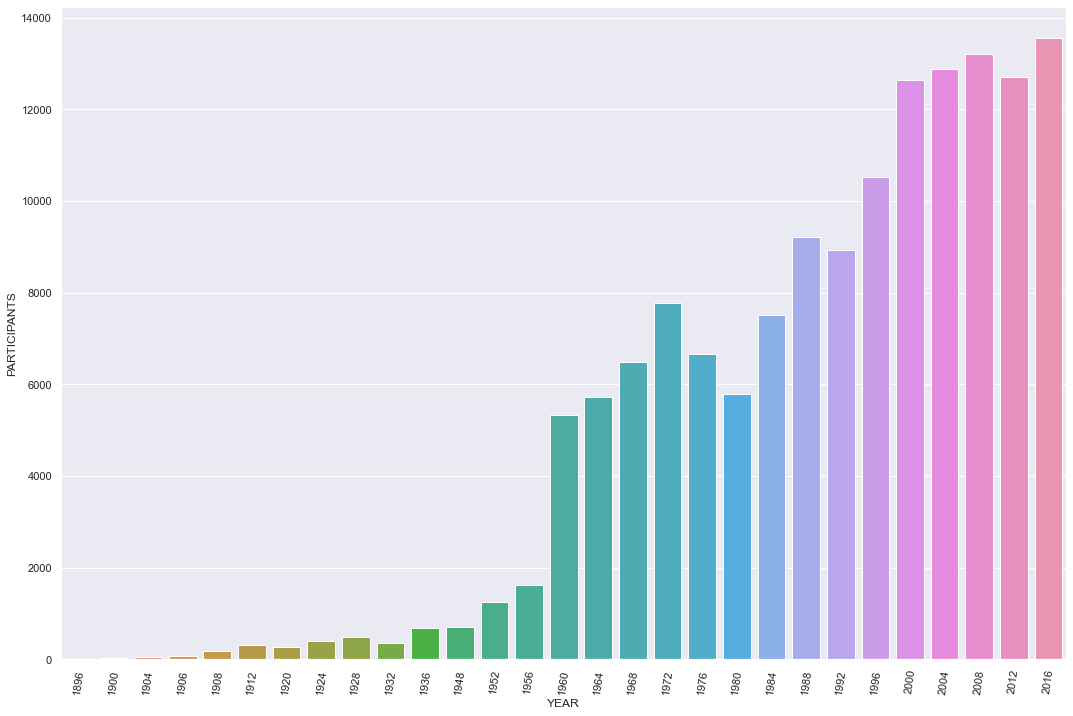

In [42]:
sns.set(rc={'figure.figsize':(18,12)})
plot1 = sns.barplot('Year','ID',data=groupedYearID).set_xticklabels(groupedYearID.Year,rotation=82)
#plot1.set(xlabel='YEAR',ylabel='Number of people')
pyplot.xlabel("YEAR")
pyplot.ylabel("PARTICIPANTS")

# 14. What are the different sports played by female players? In which sport, most numbers of female players have practiced visualize the same


In [43]:
df_female=df[df["Sex"]=="F"]
df_female["Sport"].value_counts()

Athletics                    10983
Swimming                      8455
Gymnastics                    7575
Cross Country Skiing          3086
Alpine Skiing                 2604
Rowing                        2123
Speed Skating                 1941
Biathlon                      1807
Fencing                       1774
Shooting                      1664
Volleyball                    1495
Hockey                        1390
Cycling                       1338
Handball                      1283
Canoeing                      1280
Basketball                    1207
Equestrianism                 1153
Judo                           997
Football                       984
Diving                         968
Tennis                         964
Archery                        883
Sailing                        871
Table Tennis                   862
Synchronized Swimming          849
Figure Skating                 770
Ice Hockey                     754
Short Track Speed Skating      739
Badminton           

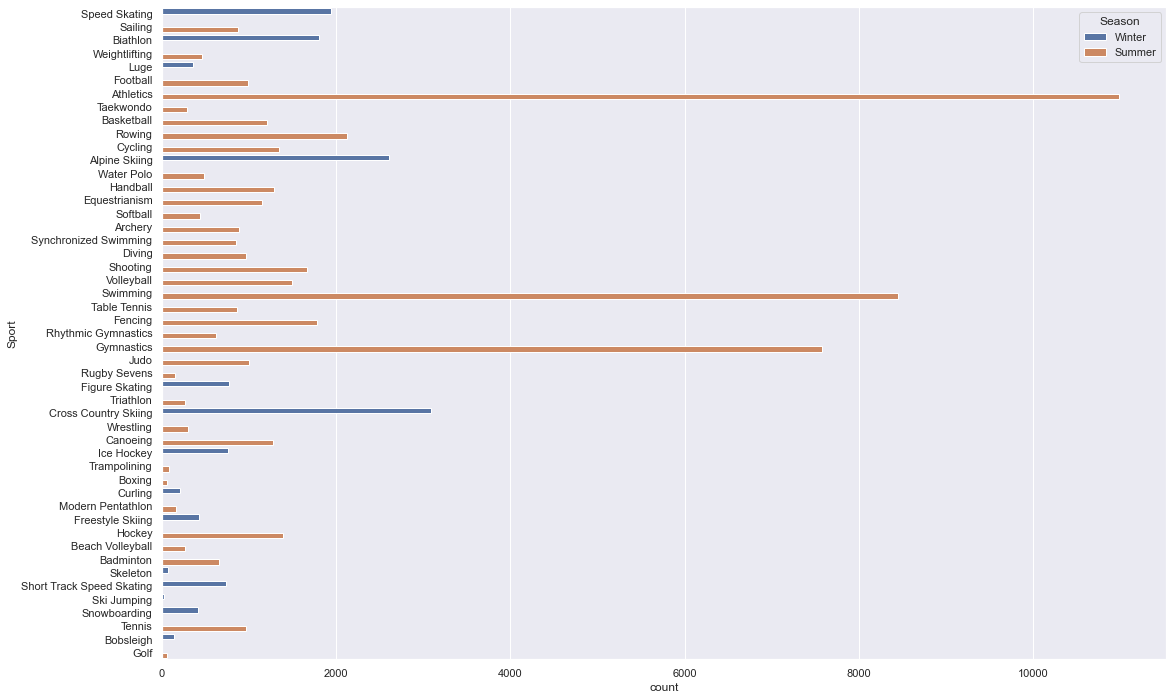

In [44]:
sns.set(rc={"figure.figsize":(18,12)})
sns.countplot(y="Sport",hue="Season",data=df_female);


# 15. Perform the above problem for male players as well.


In [45]:
df_male=df[df["Sex"]=="M"]
df_male["Sport"].value_counts()

Athletics                    21391
Gymnastics                   10696
Swimming                     10321
Cycling                       6437
Rowing                        5667
Shooting                      5596
Wrestling                     4883
Fencing                       4763
Cross Country Skiing          4443
Boxing                        4304
Canoeing                      4270
Sailing                       3992
Ice Hockey                    3825
Alpine Skiing                 3718
Football                      3459
Equestrianism                 3400
Hockey                        2874
Biathlon                      2808
Weightlifting                 2514
Basketball                    2461
Speed Skating                 2459
Judo                          2369
Water Polo                    2231
Bobsleigh                     2062
Handball                      2036
Ski Jumping                   1940
Volleyball                    1782
Modern Pentathlon             1095
Nordic Combined     

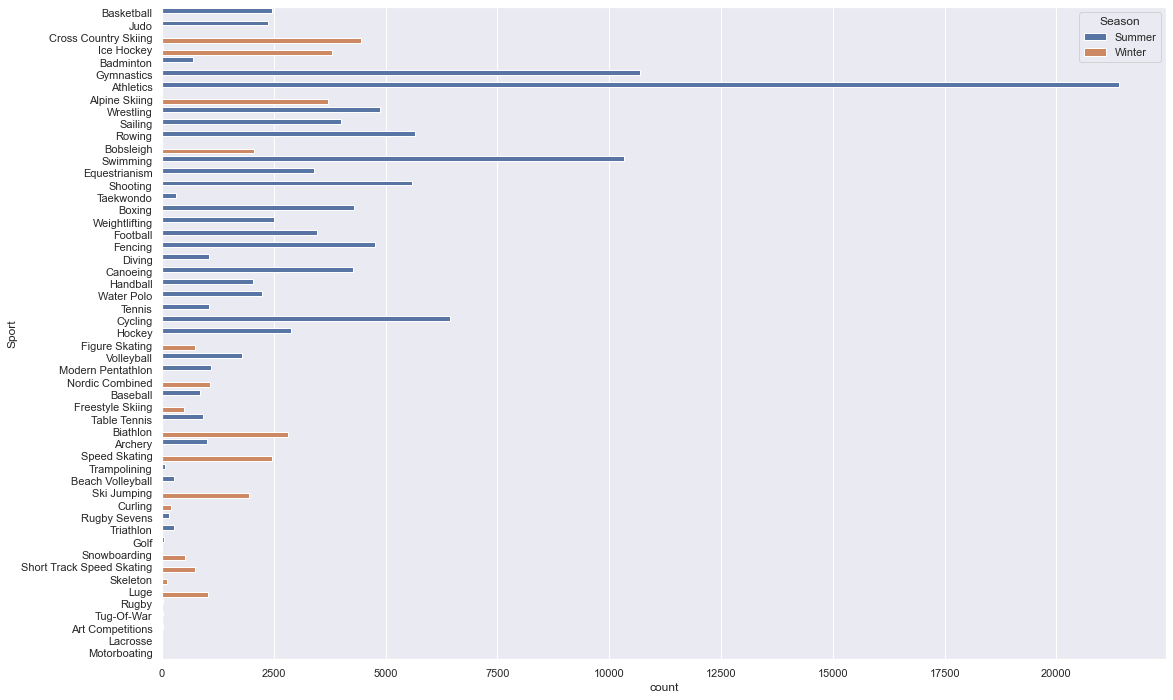

In [46]:
sns.countplot(y="Sport",hue="Season",data=df_male)
sns.set(rc={"figure.figsize":(18,22)})

# 16. Which city has the maximum number of players?

In [47]:
df["City"].value_counts()

London                    13804
Sydney                    13682
Athina                    13640
Rio de Janeiro            13443
Beijing                   13402
Atlanta                   11838
Seoul                     11618
Barcelona                 10326
Munich                     9847
Los Angeles                9366
Mexico City                8402
Montreal                   8265
Roma                       7526
Tokyo                      7368
Moskva                     6843
Sochi                      4673
Vancouver                  4378
Torino                     4365
Salt Lake City             4060
Nagano                     3518
Lillehammer                2971
Albertville                2783
Innsbruck                  2645
Melbourne                  2155
Calgary                    2018
Sarajevo                   1951
Helsinki                   1914
Grenoble                   1801
Sapporo                    1635
Lake Placid                1417
Berlin                      827
Stockhol

# 17. Show line chart which tells variation in a number of players from 1990 to 2000 of India and pakisthan


In [48]:
df_line=df[df["Team"]==('India')]
df_lc=df_line.drop(df_line[(df_line["Year"]<=1990) | (df_line["Year"]>=2000)].index)

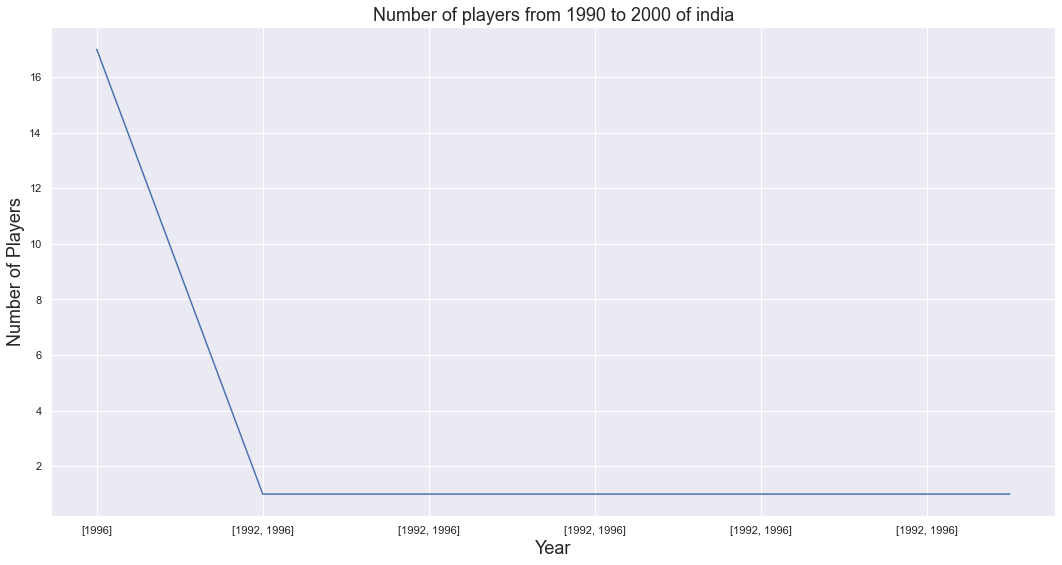

In [49]:
ax=df_lc.groupby("ID")["Year"].unique().value_counts().plot(kind="line",figsize=(18,9))
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Number of Players',fontsize=18)
ax.set_title('Number of players from 1990 to 2000 of india',fontsize=18)
plt.show()


In [50]:
df_pak=df[df["Team"]==('Pakistan')]
df_pak
df_plc=df_pak.drop(df_pak[(df_pak["Year"]<=1990) | (df_pak["Year"]>=2000)].index)
df_plc.shape

(28, 15)

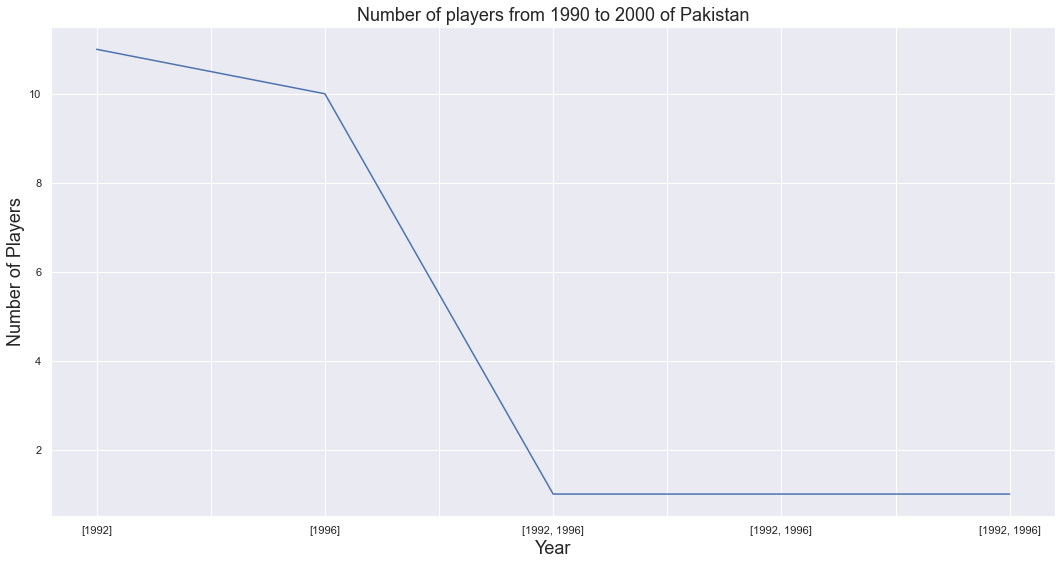

In [51]:
ax=df_plc.groupby("ID")["Year"].unique().value_counts().plot(kind="line",figsize=(18,9))
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Number of Players',fontsize=18)
ax.set_title('Number of players from 1990 to 2000 of Pakistan',fontsize=18)
plt.show()


# 18. Draw a pie chart to show the percentage of male and female players across the world

In [52]:
df["Sex"].value_counts()


M    139454
F     66711
Name: Sex, dtype: int64

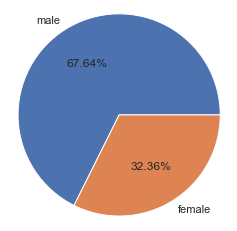

In [53]:
plt.figure(figsize=(4,4))
labels=["male","female"]
sizes=[139454,66711]
plt.pie(sizes,labels=labels,autopct="%1.2f%%")
plt.axis('equal')
plt.show();

# 19. Which team has won the maximum number of gold, silver and bronze? Visualize the same


In [54]:
df_team=df.drop(df[df["Medal"]==("No_Medal")].index)
df_team["Team"].value_counts()

United States    4273
Soviet Union     2203
Germany          1518
Australia        1196
Russia           1091
                 ... 
Zambia              1
Nadine              1
Rose Pompon         1
Niger               1
Digby               1
Name: Team, Length: 263, dtype: int64

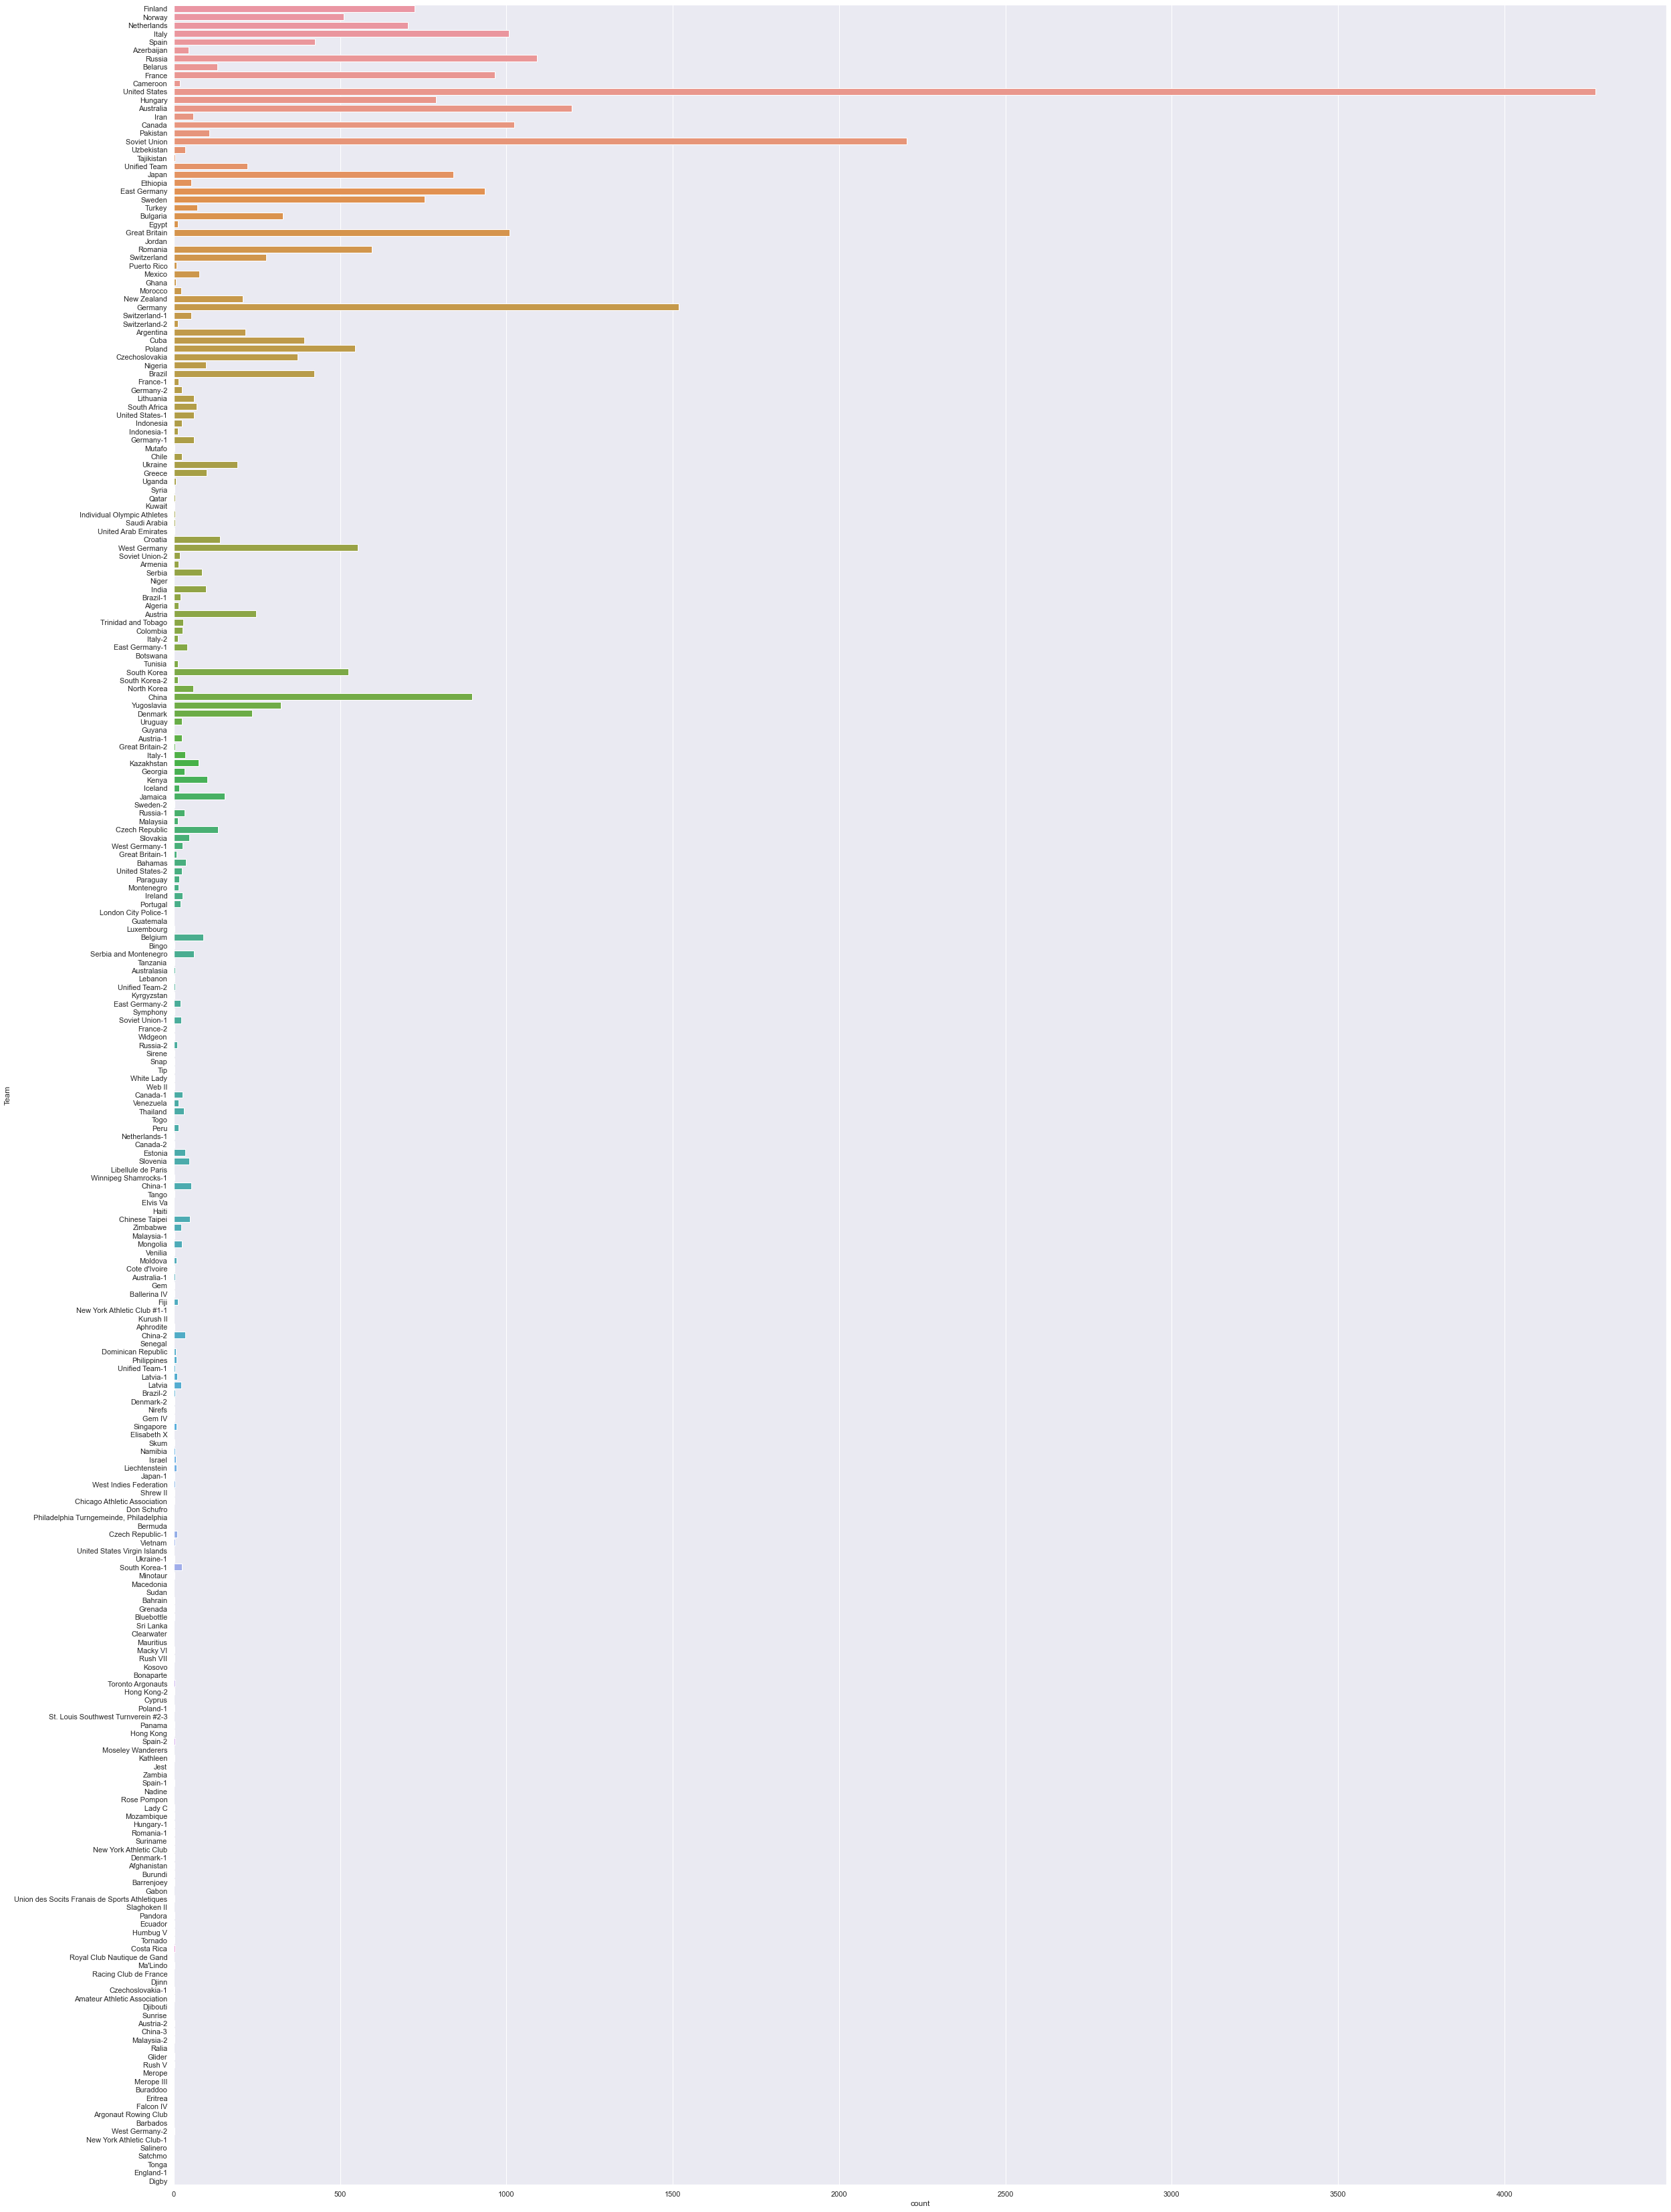

In [55]:
sns.set(rc={"figure.figsize":(40,60)})
# df_team=df[df["Medal"]==("Gold" or "Silver" or "Bronze")]
sns.countplot(y="Team",data=df_team);

# 20. Who is the tallest and shortest player?

In [56]:
max=df["Height"].max()#tallest player
df_max=df[df["Height"]==max]
df_max["Name"].unique()

array(['Yao Ming'], dtype=object)

In [57]:
min=df["Height"].min()# shortest player
df_min=df[df["Height"]==min]
df_min["Name"].unique()

array(['Rosario Briones', 'Lyton Levison Mphande'], dtype=object)